In [1]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import dask.array as da
import numcodecs

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

import intake     # For catalogs
import zarr       # Data Formatting


In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
opth='/global/cfs/cdirs/m4549/scream-cess-healpix/'

In [4]:
### Select Variable

In [14]:
var='rlut'
vart='OLR'
varu='(Wm$^{-2}$)'

#var='pr'
#vart='Precip'
#varu='(mm d$^{-2}$)'

### Read high res data and plot

/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


CPU times: user 1.64 s, sys: 1.27 s, total: 2.91 s
Wall time: 1min 34s


Text(0.5, 1.0, 'SCREAM OLR 2020-01-05 HEALPix Level 10 (6km)')

<Figure size 1200x800 with 0 Axes>

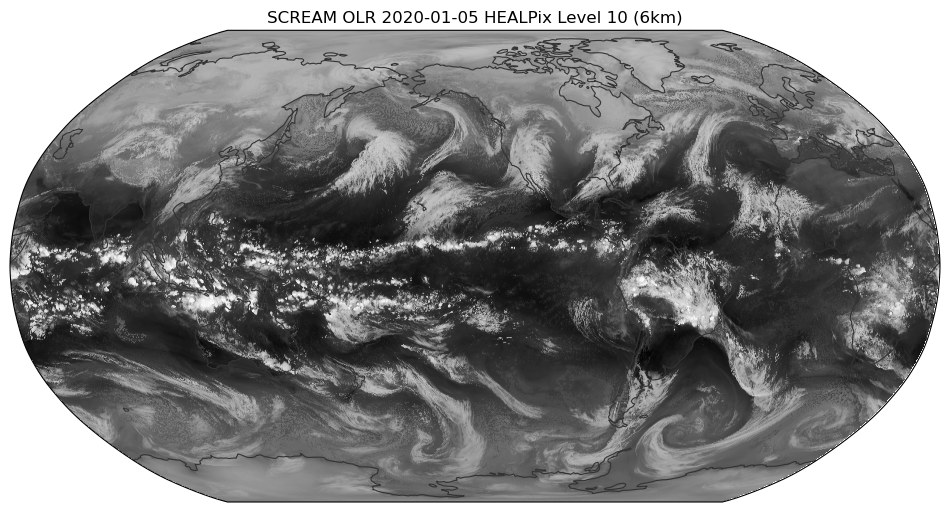

In [17]:
%%time
#s='6'; dkm='100'
#s='8'; dkm='25'
s='10' ; dkm='6'

res=' ('+dkm+'km)'

ofn=opth+"scream2D_hrly_"+var+"_hp"+s+"_v6.zarr"

ds=xr.open_dataset(ofn)

#ds['crs'].attrs['healpix_nside'] = 2**int(s)  #This corrects a mistake in Andrew's v1 and v2 zarr files.

# Add coordinates (lat and lon)
ds=ds.pipe(egh.attach_coords)

tm='2020-01-05'
egh.healpix_show(ds[var].sel(time=tm)[0],cmap='binary')
plt.title('SCREAM '+vart+' '+tm+' HEALPix Level '+s+res)

### Regional Plot

CPU times: user 104 ms, sys: 46.7 ms, total: 151 ms
Wall time: 818 ms


/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'SCREAM OLR 2020-01-05 HEALPix Level 10 (6km)')

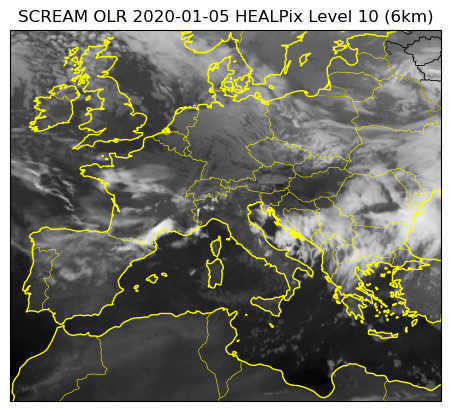

In [18]:
%%time
projection = ccrs.Robinson(central_longitude=10)
fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)
#Europe
ax.set_extent([-10, 30, 30, 60], crs=ccrs.PlateCarree())

#W. US
#ax.set_extent([-130, -110, 30, 50], crs=ccrs.PlateCarree())

#N. CA

#ax.set_extent([-124, -122, 37, 40], crs=ccrs.PlateCarree())

tm2='2020-01-05'

egh.healpix_show(ds[var].sel(time=tm2)[0],ax=ax,cmap='binary')
ax.add_feature(cf.STATES, linewidth=0.4)
ax.add_feature(cf.BORDERS, linewidth=0.4,color='yellow')
ax.add_feature(cf.COASTLINE, linewidth=1.,color='yellow')
plt.title('SCREAM '+vart+' '+tm2+' HEALPix Level '+s+res)

### Variables in SCREAM 2D dataset

In [59]:
varn2Dout=['rldscs','rlutcs', 'rlds',
            'rlus','rlut','lwcre',
            'rsdscs','rsuscs','rsutcs',
            'rsds','rsdt','rsus',
            'rsut','swcre',
            'tas','prs','pr','ps',
            'sfc_flux_lw_dn','sfc_flux_sw_net','surf_evap','ts',
            'hfssd','hflsd','huss',
            'uas','vas','tauu','tauv','clt']

vart='SW CRE'
varu='(Wm$^{-2}$)'
var='swcre'

vart='Ts'
varu='(K)'
var='tas'

### Timeseries Plot
Not wise to do with high resolution data!

/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


CPU times: user 745 ms, sys: 798 ms, total: 1.54 s
Wall time: 1min 1s


Text(0, 0.5, 'Global mean Ts (K)')

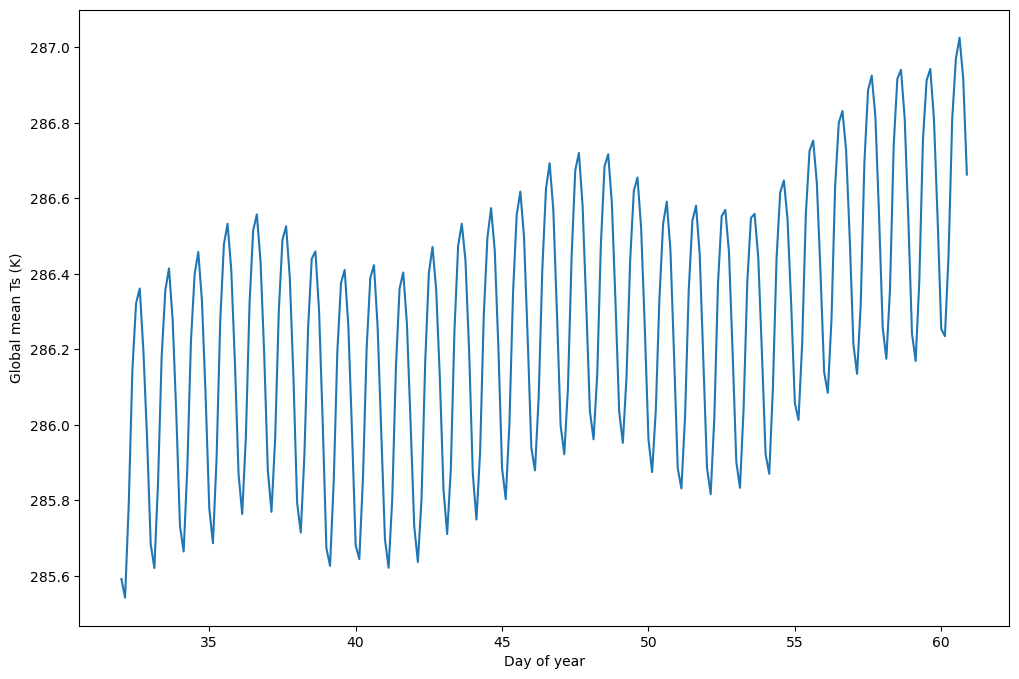

In [60]:
%%time

s='6'
ofn=opth+"scream2D_ne120_all_hp"+s+"_v6.zarr"
ds1=xr.open_dataset(ofn)
ds1=ds1.pipe(egh.attach_coords)

ts=ds1[var].mean("cell")
days=ds1.time.dt.dayofyear+ds1.time.dt.hour/24.

#Full Year
#plt.plot(days0,ts)

#Partial year 
plt.plot(days0.sel(time=slice(t1, t2)),ts.sel(time=slice(t1, t2)))

plt.xlabel('Day of year')
plt.ylabel(r'Global mean '+vart+' '+varu)
#plt.ylim([230,250.])

### Timeseries again with lower resolution data

/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/a/agett/.conda/envs/analysis4a/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


CPU times: user 44 ms, sys: 40.6 ms, total: 84.5 ms
Wall time: 2.42 s


Text(0, 0.5, 'Global mean Ts (K)')

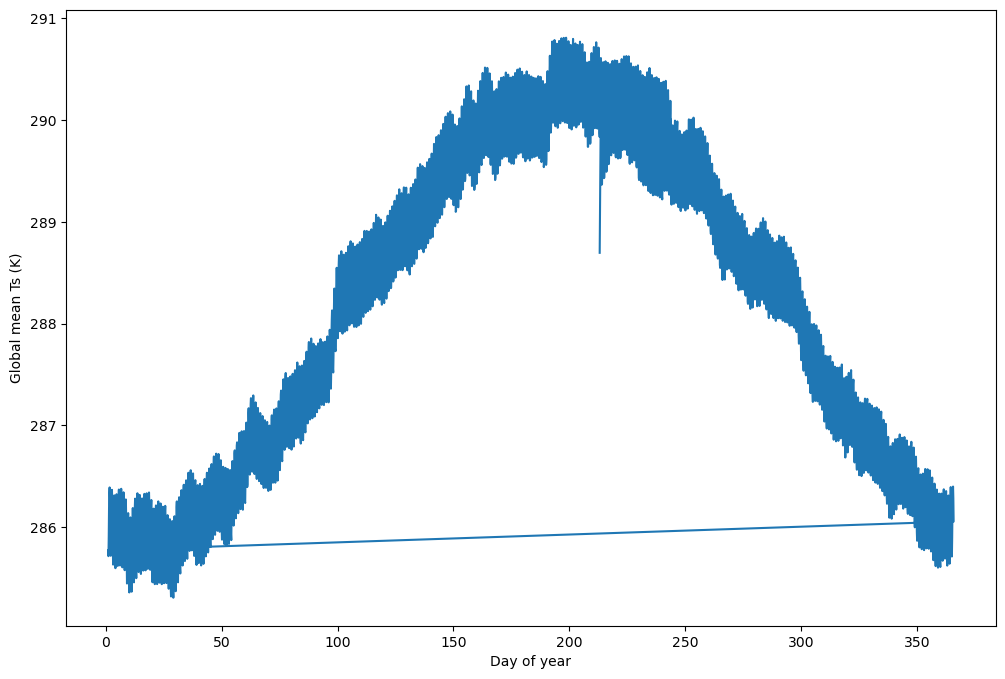

In [61]:
%%time
s='0'
ofn=opth+"scream2D_ne120_all_hp"+s+"_v6.zarr"

t1, t2 = "2020-02-01", "2020-03-01"

ds0=xr.open_dataset(ofn)
ts=ds0[var].mean("cell")
days0=ds0.time.dt.dayofyear+ds0.time.dt.hour/24.

#Full Year
plt.plot(days0,ts)

#Partial year 
#plt.plot(days0.sel(time=slice(t1, t2)),ts.sel(time=slice(t1, t2)))

plt.xlabel('Day of year')
plt.ylabel(r'Global mean '+vart+' '+varu)

### Zonal Mean

In [62]:
%%time
zm = (
    ds1[var]
    .groupby("lat")
    .mean()
).compute()

CPU times: user 5.69 s, sys: 1.97 ms, total: 5.69 s
Wall time: 5.69 s


CPU times: user 211 ms, sys: 0 ns, total: 211 ms
Wall time: 215 ms


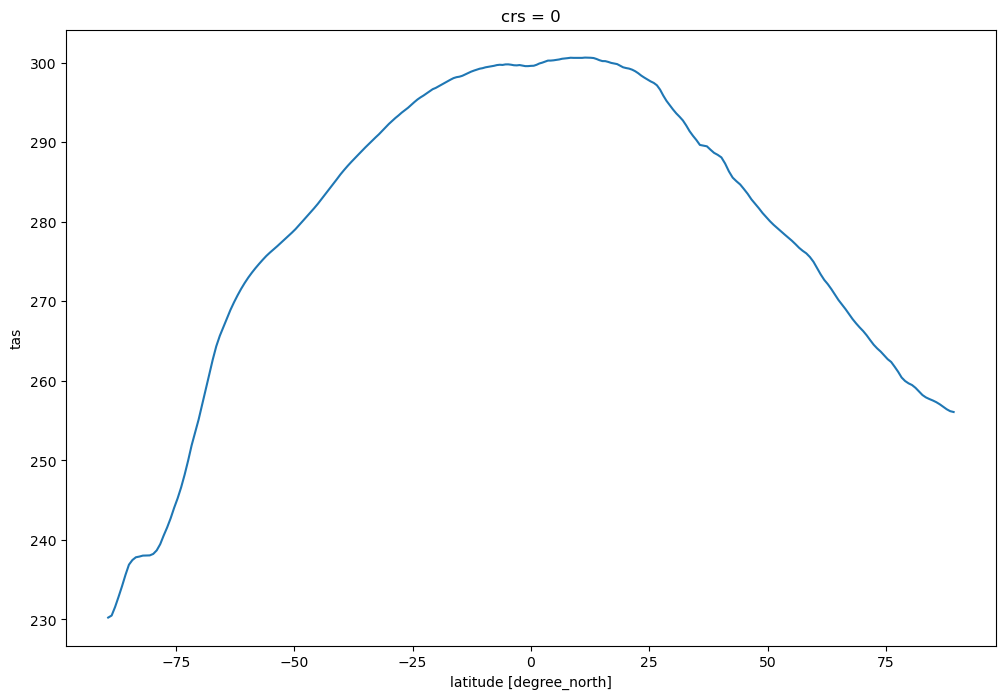

In [63]:
%%time
## Plot Zonal mean over time

zm.mean(dim='time').plot()

### Define some domains

In [64]:
domains = {
    "atlantic": lambda ds: ds["lon"] > 300,
    "east pacific": lambda ds: (ds["lon"] > 210) & (ds["lon"] < 270.0),
    "maritime continent": lambda ds: (ds["lon"] > 110) & (ds["lon"] < 150.0),
    "indian ocean": lambda ds: (ds["lon"] > 60) & (ds["lon"] < 120.0),
    "global": lambda ds: True,
}


def cells_of_domain(ds, domain_name):
    return np.where(domains[domain_name](ds))[0]

### Regional zonal mean Hovemuller

In [65]:
%%time

domain = "atlantic"
da = (
    ds1[var]
    .isel(cell=cells_of_domain(ds1, domain))
#    .resample(time="1H")
#    .mean(dim="time")
    .groupby("lat")
    .mean()
).compute()

CPU times: user 755 ms, sys: 1.16 ms, total: 756 ms
Wall time: 755 ms


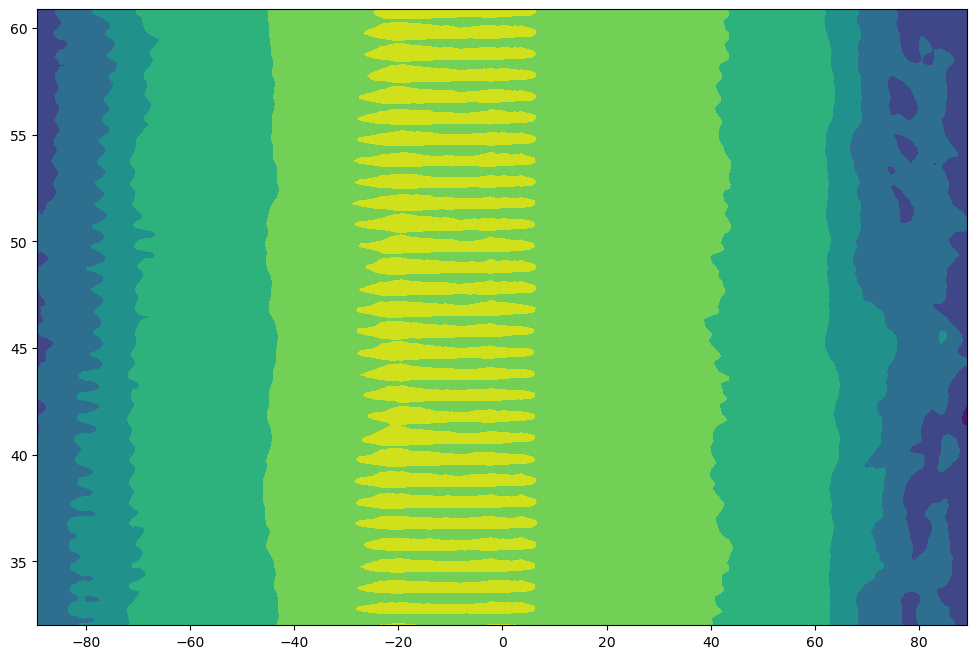

In [66]:
#%%time
t1, t2 = "2020-02-01", "2020-03-01"
plt.contourf(da.lat,days.sel(time=slice(t1, t2)),da.sel(time=slice(t1, t2)))

### Hovemoller

In [67]:
%%time

Slim, Nlim = 15.0, 35.0
t1, t2 = "2020-02-01", "2020-03-01"
da_by_lon = (
    ds1[var]
    .sel(time=slice(t1, t2))
    .where((ds1["lat"] > Slim) & (ds1["lat"] < Nlim),drop=True)
    .groupby("lon")
    .mean()
).compute()

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 146 ms


CPU times: user 23.4 ms, sys: 0 ns, total: 23.4 ms
Wall time: 22.4 ms


<unknown>:4: SyntaxWarning: invalid escape sequence '\c'
<unknown>:4: SyntaxWarning: invalid escape sequence '\c'


Text(0.5, 1.0, 'tas: 15.0$^{\\circ}$ to 35.0$^{\\circ}$')

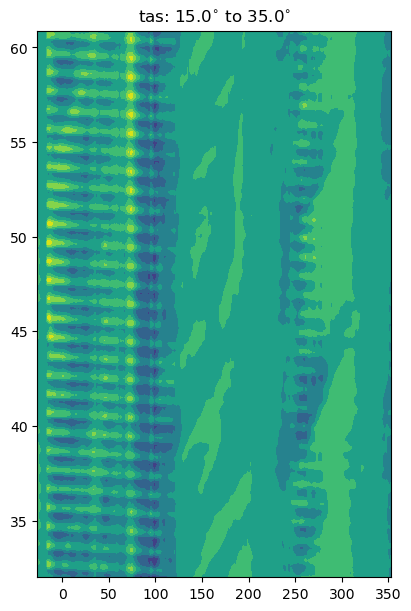

In [68]:
%%time
days=ds1.time.dt.dayofyear+ds1.time.dt.hour/24.
fig, ax = plt.subplots(figsize=(4, 6), constrained_layout=True)
plt.contourf(da_by_lon.lon,days.sel(time=slice(t1, t2)),da_by_lon)
ax.set_title(f"{var}: {Slim}$^{{\circ}}$ to {Nlim}$^{{\circ}}$")